**EXPLORATORY DATA ANALYSIS OF INSURANCE DATA**



**Import required libraries**

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 
# tells python to actually display the graphs
from sklearn.preprocessing import LabelEncoder # import lable encoder
import copy
import scipy.stats as stats

**Read the Dataframe**

In [6]:
df_ins = pd.read_csv("DATA/insurance.csv")

In [7]:
print("Top 4 rows of the data")
print(df_ins.head(4))
print("")
print("Bottom 4 rows of the data")
print(df_ins.tail(4))

Top 4 rows of the data
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061

Bottom 4 rows of the data
      age     sex    bmi  children smoker     region     charges
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603


**Basic exploratory analysis of Insurance dataframe**

In [8]:
#Shape of the date

rows, coulmn = df_ins.shape
print(f'Datataframe has {rows} rows and {coulmn} columns')

Datataframe has 1338 rows and 7 columns


In [9]:
#Data type of each attribute

df_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


*Dataframe has 7 attributes. Of these 7 attributes, 4 are numeric(age,bmi,childeren,charges) and 3 are categorical(sex,smoker, region)*

*Though children seems to be an integer but it carries information of having 0, 1, 2, 3, 4 or 5 children. It can be treated as categorical and necessary treatment can be applied as and when required*

**Presence of missing values**

In [10]:
df_ins.isnull().values.any()

False

In [11]:
df_ins.isnull().sum().sum()

0

In [12]:
df_ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

*Dataframe does not have any missing values*

**5 points summary of numerical attributes**

In [13]:
df_ins.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


*Age of the people is between 18 (min) and 64 (max). Mean and median are 39.20 and 39 respectively which shows that datapoints are almost evenly spread around mean and median*



*Range of BMI is between 15.96 (min) and 53.13 (max). Mean and median are 30.66 and 30.40 respectively. Datapoints seems to be evenly distributed*


*75% of the people in Dataframe have 2 or less children. 25% of the people have more than 2 childrens.*


*Min and Max value of charges are 1121.8 and 63770.4 respectively and median is 9382. Charges seems to be highly skewed*

**Distribution of BMI, Age and Charges**

**BMI**

<AxesSubplot:xlabel='bmi', ylabel='Count'>

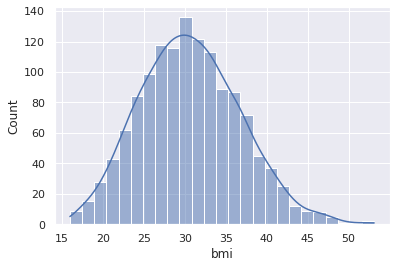

In [18]:
sns.histplot(df_ins['bmi'], kde=True)

/home/turo/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


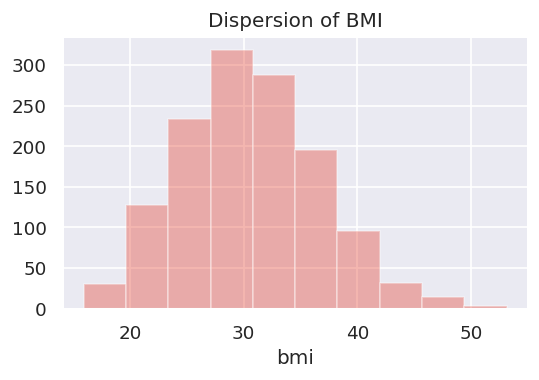

In [14]:
plt.subplots(figsize=(5,3),dpi=120)
sns.distplot(df_ins['bmi'], kde=False, bins = 10, color="#e74c3c")
plt.title("Dispersion of BMI");

*BMI seems to have bell shaped curve but its right tail stretched a bit which indicates the existence of extreme values*

**Age**

<AxesSubplot:xlabel='age', ylabel='Count'>

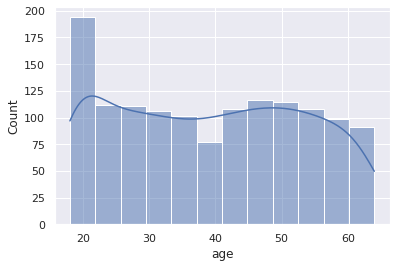

In [19]:
sns.histplot(df_ins['age'], kde=True)

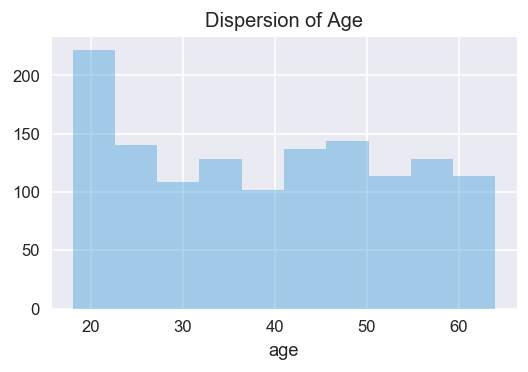

In [12]:
plt.subplots(figsize=(5,3),dpi=120)
sns.distplot(df_ins['age'], kde=False, bins = 10, color='#3498db');
plt.title("Dispersion of Age");

*Age is almost uniformly distributed*

*Number of people with age around 20 seems to be maximum in the data*

In [20]:
df_ins.age.value_counts().head()

18    69
19    68
50    29
51    29
47    29
Name: age, dtype: int64

*Number of people with age 18 and 19 are maximum in the dataframe*

**Charges**

<AxesSubplot:xlabel='charges', ylabel='Count'>

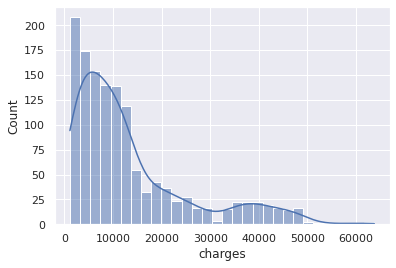

In [22]:
sns.histplot(df_ins['charges'], kde=True)

/home/turo/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


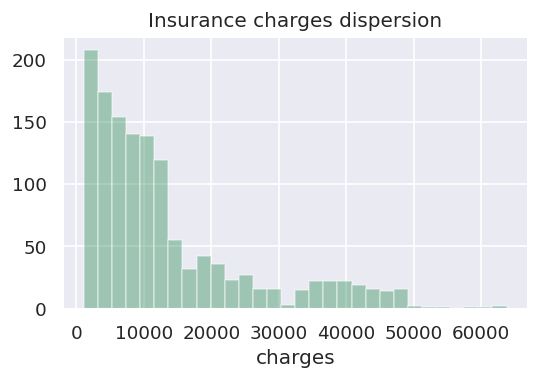

In [21]:
plt.subplots(figsize=(5,3), dpi=120)
sns.distplot(df_ins['charges'], kde=False, color='seagreen')
plt.title('Insurance charges dispersion');

*Charges are highly skewed*

**Distribution of categorical variables including children**

**Children**

<AxesSubplot:xlabel='children', ylabel='count'>

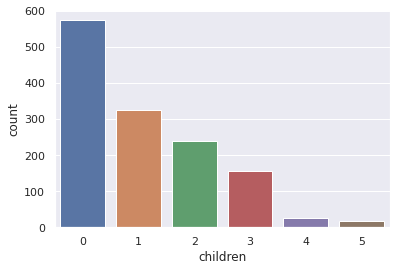

In [25]:
sns.countplot( x= df_ins['children'], data = df_ins)

/home/turo/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


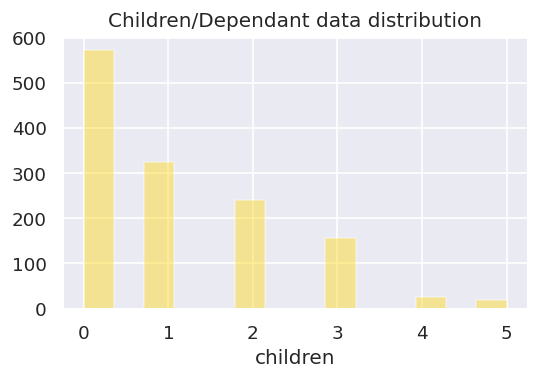

In [23]:
plt.subplots(figsize=(5,3), dpi=120)
sns.distplot(df_ins['children'], kde=False, color='gold');
plt.title("Children/Dependant data distribution");

*Number of people with 0 children or dependant are maximum and number of people with 5 childrens or dependants are minimum*

**Sex**

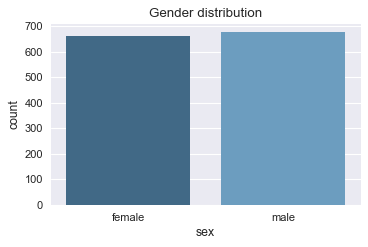

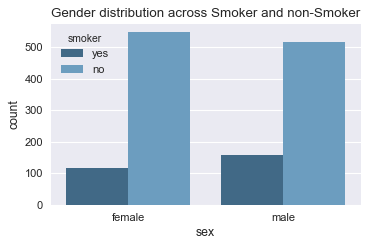

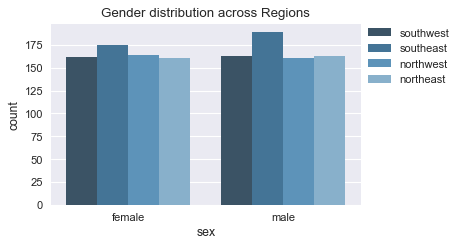

In [16]:
plt.subplots(figsize=(5,3), dpi=80)
sns.countplot(df_ins['sex'], palette="Blues_d")
plt.title("Gender distribution")

plt.subplots(figsize=(5,3),dpi=80)
sns.countplot(df_ins['sex'], hue=df_ins['smoker'], palette="Blues_d")
plt.title("Gender distribution across Smoker and non-Smoker");

plt.subplots(figsize=(5,3), dpi=80)
sns.countplot( df_ins['sex'], hue=df_ins['region'], palette="Blues_d")
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Gender distribution across Regions")

plt.show;

*Number of Males and Number of Females seems to be almost equal*

*Number of smokers are more in Male than Female*

*Southeast region has highest population*

*Cross tab of Gender distribution across Gender and Smoker/Non-Smoker*

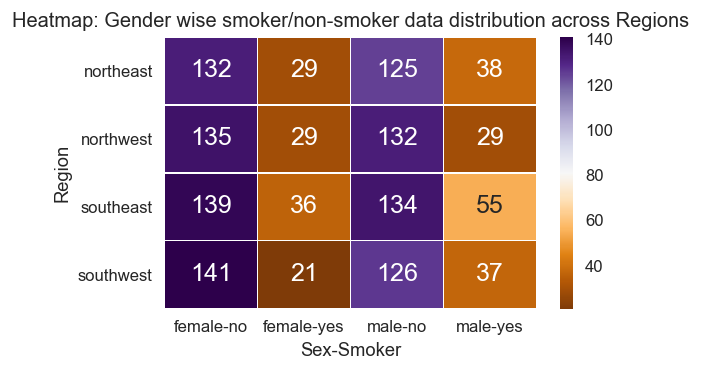

In [18]:
ins_crosstab = pd.crosstab([df_ins.region],[df_ins.sex, df_ins.smoker],
           rownames = ['Region'],
           colnames = ['Sex', 'Smoker'])

plt.subplots(figsize=(5,3),dpi=120)
sns.heatmap(ins_crosstab, cmap = "PuOr", annot=True,fmt = 'd',annot_kws={"size": 15},cbar=True, linewidths = .3)
plt.title("Heatmap: Gender wise smoker/non-smoker data distribution across Regions");

*Clearly, Southeast region have highest population and Northeast have least*

**Region**

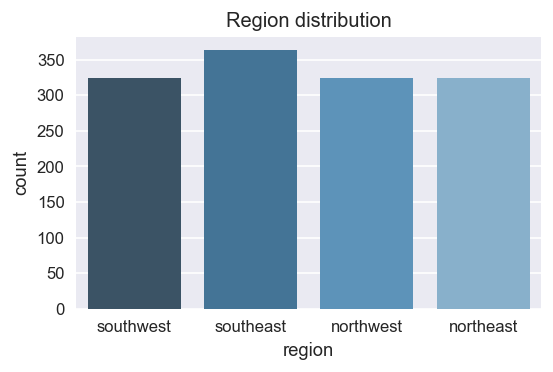

In [19]:
plt.subplots(figsize=(5,3), dpi=120)
sns.countplot(df_ins['region'], palette="Blues_d")
plt.title("Region distribution");

*Same insights can be drawn here as well that Southeast region has highest population and Northeast has least. Southwest has more population than Northwest.*

**Pairplot**

*Label encoding the categorical variables before doing a pairplot because pairplot ignores strings*

In [27]:
df_ins.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [28]:
df_ins.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [31]:
df_ins_encoded.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


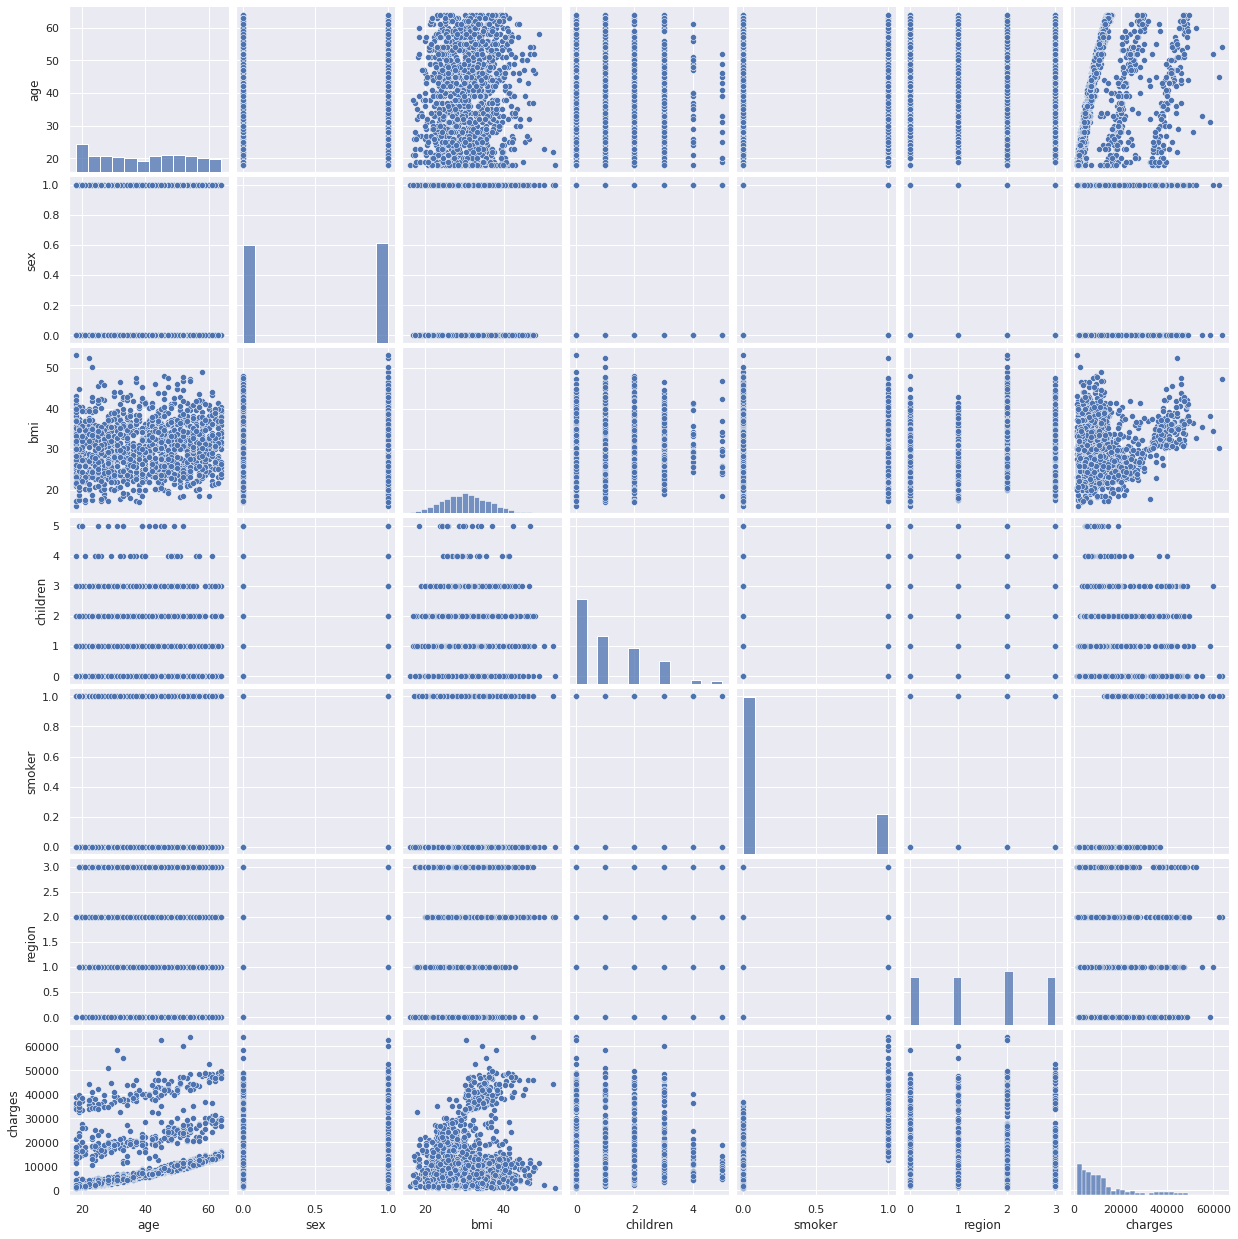

In [30]:
df_ins_encoded = copy.deepcopy(df_ins)
df_ins_encoded.loc[:,['sex', 'smoker', 'region']] = df_ins_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

sns.pairplot(df_ins_encoded);

*The only obvious relation is between age and smoker/non-smoker. Smokers claimed more money than non-smokers*

*Other interesting pattern is between charges and age. Seems to have positive correlation between the two. May be aged people are charged more for same ailment*

**Measure of Skewness of bmi, age and charges**

In [32]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df_ins.bmi),stats.skew(df_ins.age),stats.skew(df_ins.charges)]},
                        index=['bmi','age','charges'])  
Skewness.T

,bmi,age,charges
Skewness,0.283729,0.05561,1.51418


*Age has hardly any skewness*

*BMI has very less skewness since data is almost uniformly distributed*

*Charges is highly skewed. It is positive skewness (right skewed)*

**Presence of outliers in bmi, age and charges**

**BMI**

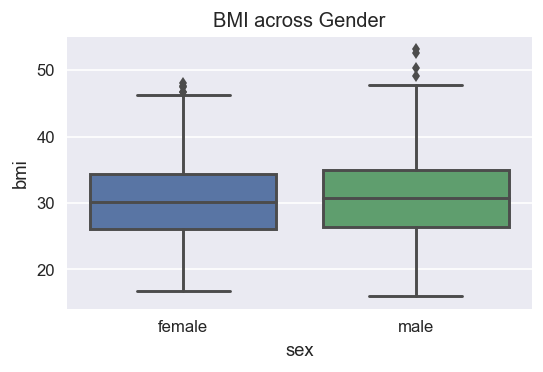

In [22]:
plt.subplots(figsize=(5,3), dpi=120)
sns.boxplot(x = df_ins['sex'],y=df_ins['bmi'])
plt.title('BMI across Gender');

*BMI has some extreme values*

*Outliers in BMI are present in both Male and Female whereas Male seems to have outliers in BMI far from upper whisker*

**Age**

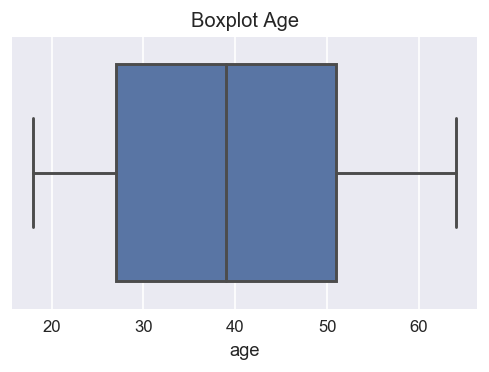

In [23]:
plt.subplots(figsize=(5,3),dpi=120)
sns.boxplot(df_ins['age'])
plt.title('Boxplot Age');

*Age do not have any extreme any value*

**Charges**

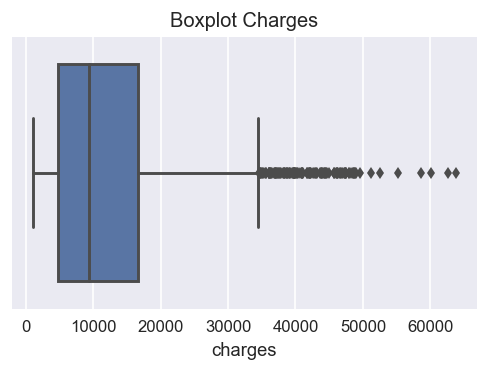

In [24]:
plt.subplots(figsize=(5,3),dpi=120)
sns.boxplot(df_ins['charges'])
plt.title('Boxplot Charges');

*Charges have quite number of extreme values outside the upper whisker which makes the attribute positively skewed*

**Statistical evidence**

**1. Do charges of people who smoke differ significantly from the people who don't?**

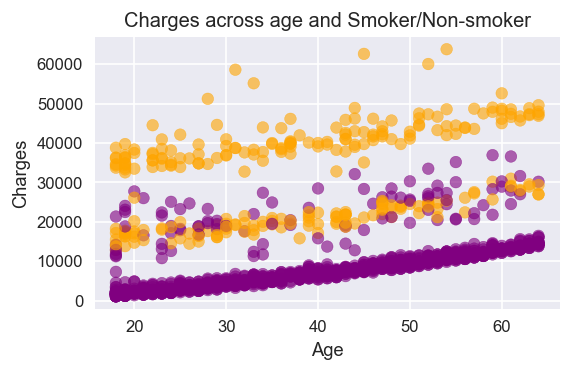

In [25]:
plt.subplots(figsize=(5,3), dpi=120)
colors = {'yes':'orange', 'no':'purple'}
plt.scatter(df_ins['age'], df_ins['charges'],alpha=0.6, c= df_ins['smoker'].apply(lambda x: colors[x]))
plt.title('Charges across age and Smoker/Non-smoker')
plt.xlabel('Age')
plt.ylabel('Charges');

*People who smoke are depicted in orange and who don't are depicted in purple in the scatter plot'*

*It is visually clear that smokers are charged higher than non-smokers across the age*

**Perform t test to check whether mean of charges in male significantly differ from mean of charges in female**

**Here a sample of data i.e. medical cost of certain people along with some other attributes is given where the population variance or population standard error is not known and has to be calculated, therefore t test is used instead of z test.**

In [33]:
# Two sample t test to check whether mean of charges in male significantly differ from mean of charges in female
Ho = "Mean Charges of smoker and non-smoker are same"   # Stating the Null Hypothesis
Ha = "Mean Charges of smoker and non-smoker are different"   # Stating the Alternate Hypothesis

x = np.array(df_ins[df_ins.smoker == 'yes'].charges)  # Selecting charges corresponding to smokers as an array
y = np.array(df_ins[df_ins.smoker == 'no'].charges) # Selecting charges corresponding to non-smokers as an array

t,p_value  = stats.ttest_ind(x,y, axis = 0)

## !!!!!! T test and P value Theories AFTER This Practice 
if p_value < 0.05:
    print(f'{Ha} as the p value - {p_value.round(3)} < 0.05')
else:
    print(f'{Ho} as the p value - {p_value.round(3)} > 0.05')

Mean Charges of smoker and non-smoker are different as the p value - 0.0 < 0.05


*Charges of people who smoke significantly different from charges of people who do not smoke as we reject the null hypothesis*

**2. Does bmi of males differ significantly from that of females?**

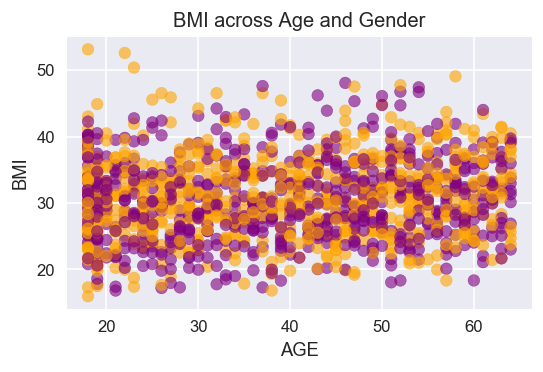

In [27]:
plt.subplots(figsize=(5,3), dpi=120)
colors = {'female':'purple', 'male':'orange'}
plt.scatter(df_ins.age, df_ins.bmi, alpha=0.6, c=df_ins.sex.apply(lambda x: colors[x]))
plt.title('BMI across Age and Gender')
plt.xlabel('AGE')
plt.ylabel('BMI');

*Females are depicted in orange colour and Males are depicted in purple colour*

*It is visually clear that BMI has no relation with Gender across the ages*

**Perform t test to check whether mean of BMI in male significantly differ from mean of BMI in female**

**Here a sample of data i.e. medical cost of certain people along with some other attributes is given where the population variance or population standard error is not known and has to be calculated, therefore t test is used instead of z test.**

In [34]:
Ho = "Mean of BMI in males is same as Mean of BMI in females"   # Stating the Null Hypothesis
Ha = "Mean of BMI in males is different from Mean of BMI in females"   # Stating the Alternate Hypothesis

x = np.array(df_ins[df_ins.sex == 'male'].bmi)  # Selecting bmi values corresponding to males as an array
y = np.array(df_ins[df_ins.sex == 'female'].bmi) # Selecting bmi values corresponding to females as an array

t,p_value  = stats.ttest_ind(x,y, axis = 0)

if p_value < 0.05:
    print(f'{Ha} as the p_value {p_value.round(3)} < 0.05')
else:
    print(f'{Ho} as the p_value {p_value.round(3)} > 0.05')

Mean of BMI in males is same as Mean of BMI in females as the p_value 0.09 > 0.05


*Statiscally, we are unable to establish any relation between BMI and Gender, whether BMI depends on Genders or not since we fail to reject the null hypothesis*

**Alternate way to test the dependence of BMI on Gender is using Chi-Square test**

In [35]:
eighteen = df_ins[df_ins['age'] == 18]
eighteen.sex.value_counts()
sample_18_male = eighteen[eighteen['sex'] == 'male'].bmi.iloc[:-3]   #excluding last three elements
sample_18_female = eighteen[eighteen['sex'] == 'female'].bmi

v1, v2 = np.var(sample_18_female) , np.var(sample_18_male)

n = 33  # number of samples
dof = n - 1  # degrees of freedom
alpha = 0.05  # significance level
chi_critical = 46.19    # critical chi_squared statistic for dof 32 and significance level 0.05 from chi square table

Ho = "BMI of males is no different from that of females"   # Stating the Null Hypothesis
Ha = "BMI of males is different from that of females"   # Stating the Alternate Hypothesis

chi = (dof*v1)/v2

if chi < chi_critical:
    print(f'{Ho} as chi sqaured test statistic {chi} is less than the chi squared critical value {chi_critical}, we fail to reject Ho')
else:
    print(f'{Ha} as chi sqaured test statistic {chi} is more than the chi squared critical value {chi_critical}')

BMI of males is no different from that of females as chi sqaured test statistic 24.135100065512972 is less than the chi squared critical value 46.19, we fail to reject Ho


**3. Is the proportion of smokers significantly different in different Genders?**

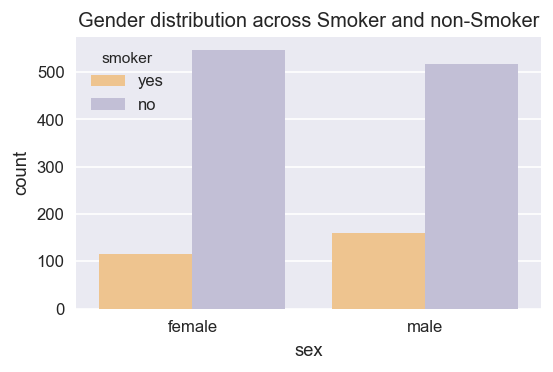

In [37]:
plt.subplots(figsize=(5,3),dpi=120)
sns.countplot(df_ins['sex'], hue=df_ins['smoker'], palette="PuOr")
plt.title("Gender distribution across Smoker and non-Smoker");

*It can be observed in above graph that Male non-smokers are less in number comparison to female non-smokers and Male smokers are more in number in comparison to female smokers*

**Chi-square test to check whether proportion of smokers significantly different in different Genders**

*Chi-square test is used to understand the relation between the one categorical variable i.e. Smoker/Non-Smoker on other categorical variable i.e. Male/Female*

*Cross tab is used and plotted as well in the form of heatmap before the chi-square test output*

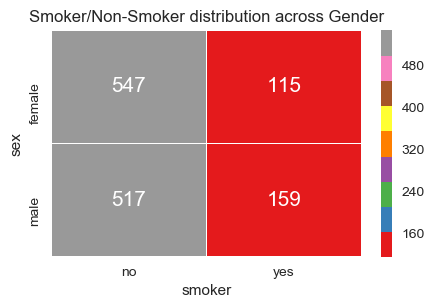

Smoking habits are different for different gender as the p_value (0.007) < 0.05


In [38]:
Ho = "Smoking habits are same for different gender"   # Stating the Null Hypothesis
Ha = "Smoking habits are different for different gender"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(df_ins.sex,df_ins.smoker)  # Contingency table of sex and smoker attributes

plt.subplots(figsize=(5,3),dpi=100)
sns.heatmap(crosstab, cmap = "Set1", annot=True,fmt = 'd',annot_kws={"size": 15},cbar=True, linewidths = .3)
plt.title("Smoker/Non-Smoker distribution across Gender");
plt.show()

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

*It can be said that Proportion of smokers significantly different in different Genders i.e. Male and Female as we reject the null hypothesis*

**4. Is the distribution of bmi across women with no children, one children and two children, the same?**

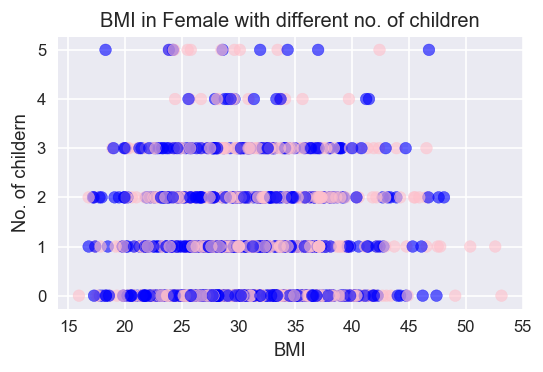

In [39]:
plt.subplots(figsize=(5,3), dpi=120)
colors = {'female':'blue', 'male':'pink'}
plt.scatter(df_ins['bmi'], df_ins['children'],alpha=0.6, c= df_ins['sex'].apply(lambda x: colors[x]))
plt.title('BMI in Female with different no. of children')

plt.xlabel('BMI')
plt.ylabel('No. of childern');

*Female are depicted in blue colour and male are depicted in pink colour*

*It seems like distribution of BMI in females with 0,1,2,3,4 or 5 childrens is same*

**Perform One-way ANOVA to test if the Distribution of BMI in females with 0,1,2,3,4 or 5 childrens is same**

In [40]:
female_df = copy.deepcopy(df_ins[df_ins['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']

Ho = "Distribution of BMI in females with 0,1,2,3,4 or 5 childrens is same"   # Stating the Null Hypothesis
Ha = "distribution of BMI in females with 0,1,2,3,4 or 5 childrens is different"   # Stating the Alternate Hypothesis


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Distribution of BMI in females with 0,1,2,3,4 or 5 childrens is same as the p_value (0.716) > 0.05


*We can say BMI is same in Female with different number of children since we fail to reject the null hypothesis*

**SUMMARY**

**Insurance dataframe has 7 columns namely age, bmi, charges, children, sex, smoker and region with 1338 records**

**BMI seems to have bell shaped curve but its right tail stretched a bit which indicates the existence of extreme values. It becomes evident that it has outliers in box plot**

**Age is uniformly distributed**

**Insurance charges are positively skewed since it has many extreme values**

**75% of the people have 2 or less children**

**Number of female smokers are less than that of male smokers. Number of female non-smokers are more than that of male non-smokers**

**Southeast region has highest population and Northeast has least. Southwest has more population than Northwest.**

**Charges of smokers and non-smokers are statistically different**

**BMI is statistically same for different Genders**

**Smoking habits are statiscally different for different Genders**

**Distribution of BMI in females with 0,1,2,3,4 or 5 childrens is same**

# Thank-you